In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
np.random.seed(42)
%matplotlib inline

# 1. What is Machine Learning?

Machine Learning (ML) is a subset of artificial intelligence that focuses on developing systems that can learn from and make decisions based on data. Unlike traditional programming where we explicitly write rules, ML algorithms learn patterns from data to make predictions or decisions.

## Learning in General

Learning can be defined as the process of improving performance on a specific task through experience. In ML, this translates to:
- **Experience**: Training data
- **Task**: The problem we're trying to solve (prediction, classification, etc.)
- **Performance**: How well our model performs (measured by metrics)

The fundamental goal is to learn patterns that generalize well to unseen data.

# 2. Types of Machine Learning

## 2.1 Supervised Learning
- Learning from labeled data
- Goal: Learn a mapping from inputs to outputs
- Examples: Classification, Regression

## 2.2 Unsupervised Learning
- Learning from unlabeled data
- Goal: Find hidden patterns or structures in data
- Examples: Clustering, Dimensionality Reduction

## 2.3 Reinforcement Learning
- Learning through interaction with an environment
- Goal: Learn optimal actions to maximize rewards
- Examples: Game playing, Robot navigation


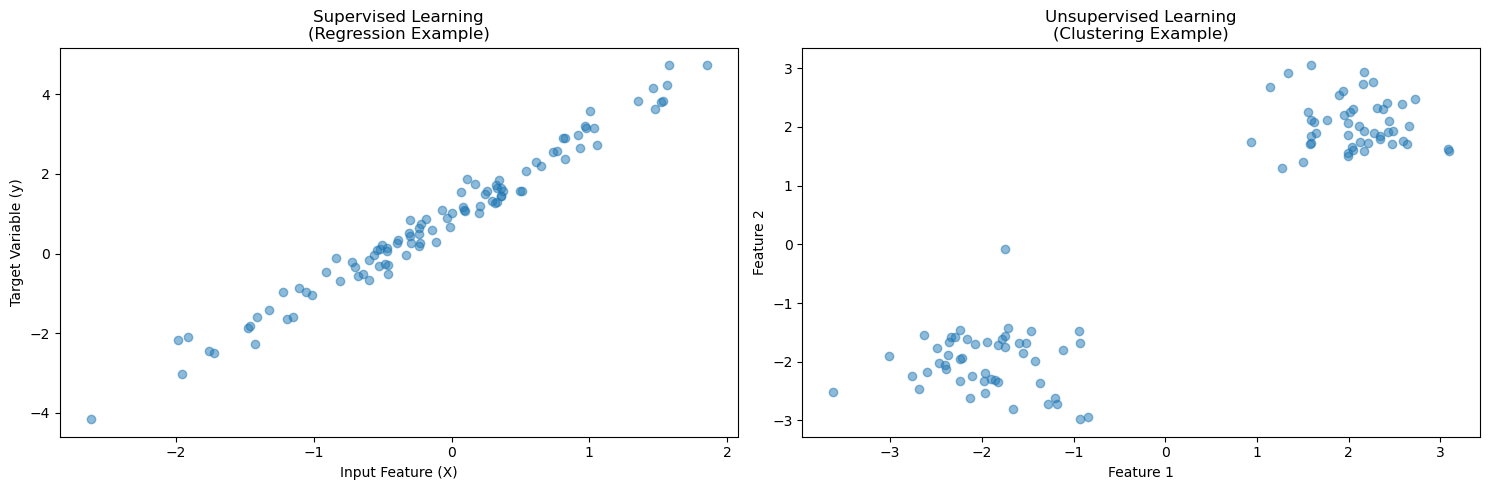

In [7]:
# Create example data for visualization
def create_example_data():
    # Supervised Learning Example
    X_supervised = np.random.normal(size=(100, 1))
    y_supervised = 2 * X_supervised + 1 + np.random.normal(scale=0.3, size=(100, 1))

    # Unsupervised Learning Example
    cluster1 = np.random.normal(loc=(-2, -2), scale=0.5, size=(50, 2))
    cluster2 = np.random.normal(loc=(2, 2), scale=0.5, size=(50, 2))
    X_unsupervised = np.vstack([cluster1, cluster2])

    return X_supervised, y_supervised, X_unsupervised

X_sup, y_sup, X_unsup = create_example_data()

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Supervised Learning Plot
ax1.scatter(X_sup, y_sup, alpha=0.5)
ax1.set_title('Supervised Learning\n(Regression Example)')
ax1.set_xlabel('Input Feature (X)')
ax1.set_ylabel('Target Variable (y)')

# Unsupervised Learning Plot
ax2.scatter(X_unsup[:, 0], X_unsup[:, 1], alpha=0.5)
ax2.set_title('Unsupervised Learning\n(Clustering Example)')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')

plt.tight_layout()
plt.show()


# 3. The Learning Problem

The fundamental learning problem can be formulated as follows:

Given:
- A task $T$
- A performance measure $P$
- Training experience $E$

Find:
- A function $f: X \rightarrow Y$ that optimizes $P$ on $T$


Mathematically, we can express this as:

$f^* = \text{argmin}_f \mathbb{E}_{(x,y)\sim D}[L(f(x), y)]$

Where:
- $f^*$ is the optimal function
- $D$ is the true data distribution
- $L$ is the loss function
- $x$ is the input
- $y$ is the true output

# 4. Basic Terminology

## 4.1 Key Terms
- **Features (X)**: Input variables used for prediction
- **Labels (y)**: Output variables we're trying to predict
- **Model**: The function we learn from data
- **Parameters**: Values learned during training
- **Hyperparameters**: Configuration values set before training
- **Training**: Process of learning from data
- **Inference**: Using the trained model to make predictions

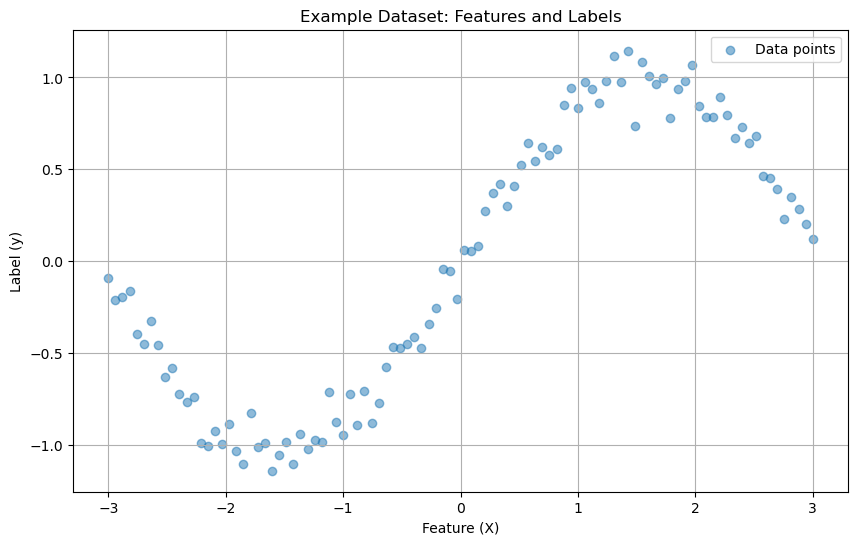

In [8]:
# Create sample data
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = np.sin(X) + np.random.normal(0, 0.1, size=X.shape)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Data points')
plt.xlabel('Feature (X)')
plt.ylabel('Label (y)')
plt.title('Example Dataset: Features and Labels')
plt.legend()
plt.grid(True)
plt.show()

# 5. Training vs Testing

One of the most fundamental concepts in machine learning is the division between training and testing data:

- **Training Data**: Used to learn the model parameters
- **Testing Data**: Used to evaluate model performance on unseen data

The key principle is that we must evaluate our model on data it hasn't seen during training to get an honest estimate of its performance.


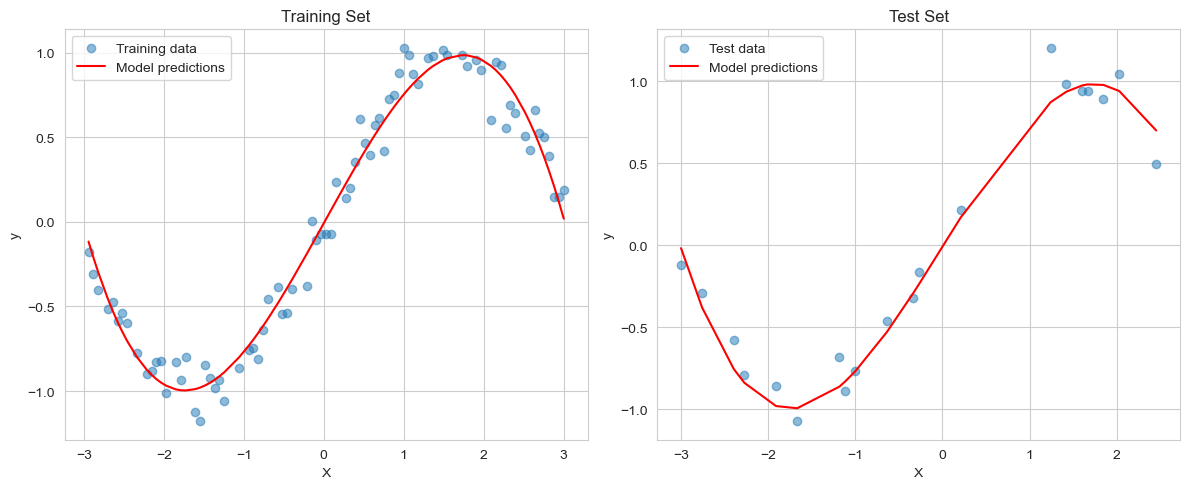

In [16]:
def create_nonlinear_data(n_samples=100, noise=0.1):
    X = np.linspace(-3, 3, n_samples).reshape(-1, 1)
    y = np.sin(X) + np.random.normal(0, noise, size=X.shape)
    return X, y

# Create and split data
X, y = create_nonlinear_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a polynomial regression
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

# Sort the data for smooth line plotting
train_idx = np.argsort(X_train.ravel())
test_idx = np.argsort(X_test.ravel())

# Make predictions
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Plot results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, alpha=0.5, label='Training data')
plt.plot(X_train[train_idx], y_train_pred[train_idx], 'r-', label='Model predictions')
plt.title('Training Set')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, alpha=0.5, label='Test data')
plt.plot(X_test[test_idx], y_test_pred[test_idx], 'r-', label='Model predictions')
plt.title('Test Set')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

# 6. Generalization

Generalization refers to a model's ability to perform well on unseen data. It's the ultimate goal of machine learning.

## Mathematical Definition

The generalization error (or true error) is defined as:

$E_{out} = \mathbb{E}_{(x,y)\sim D}[L(h(x), y)]$

Where:
- $E_{out}$ is the generalization error
- $D$ is the true data distribution
- $L$ is the loss function
- $h$ is our hypothesis (model)

The empirical error (training error) is:

$E_{in} = \frac{1}{n}\sum_{i=1}^n L(h(x_i), y_i)$

The goal is to minimize $E_{out}$, but we can only observe $E_{in}$.

# 7. Bias-Variance Tradeoff

The bias-variance tradeoff is a fundamental concept in machine learning that helps us understand prediction error.

## Mathematical Decomposition

For a given point x, the expected prediction error can be decomposed as:

$\mathbb{E}[(y - \hat{f}(x))^2] = \text{Bias}[\hat{f}(x)]^2 + \text{Variance}[\hat{f}(x)] + \sigma^2$

Where:
- **Bias**: Error from wrong assumptions
- **Variance**: Error from sensitivity to training data
- $\sigma^2$: Irreducible error

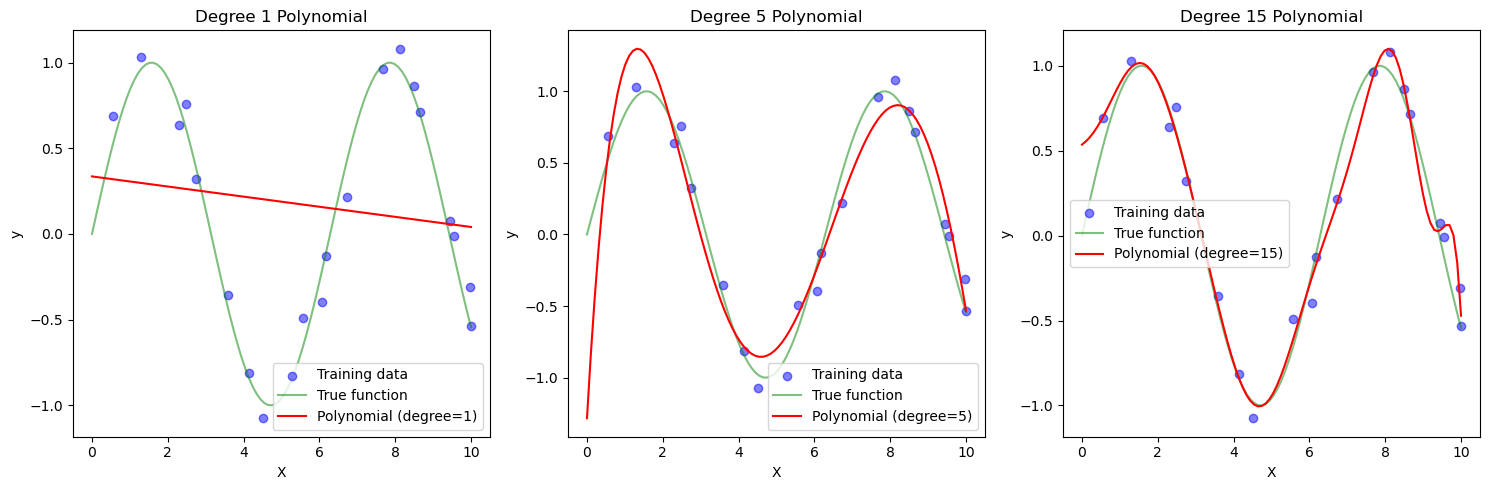

In [12]:
def generate_bias_variance_data():
    # Generate true function
    X = np.linspace(0, 10, 100)
    y_true = np.sin(X)

    # Generate training data points
    X_train = np.random.uniform(0, 10, 20)
    y_train = np.sin(X_train) + np.random.normal(0, 0.1, 20)

    return X, y_true, X_train, y_train

X, y_true, X_train, y_train = generate_bias_variance_data()

# Fit models with different complexities
degrees = [1, 5, 15]  # Different polynomial degrees
plt.figure(figsize=(15, 5))

for i, degree in enumerate(degrees, 1):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X.reshape(-1, 1))
    X_train_poly = poly.transform(X_train.reshape(-1, 1))

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_pred = model.predict(X_poly)

    plt.subplot(1, 3, i)
    plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Training data')
    plt.plot(X, y_true, 'g-', label='True function', alpha=0.5)
    plt.plot(X, y_pred, 'r-', label=f'Polynomial (degree={degree})')
    plt.title(f'Degree {degree} Polynomial')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()

plt.tight_layout()
plt.show()

# 8. Overfitting and Underfitting

- **Underfitting**: Model is too simple to capture the underlying pattern (high bias)
- **Overfitting**: Model is too complex and captures noise in the training data (high variance)
- **Just right**: Model captures the underlying pattern without fitting the noise


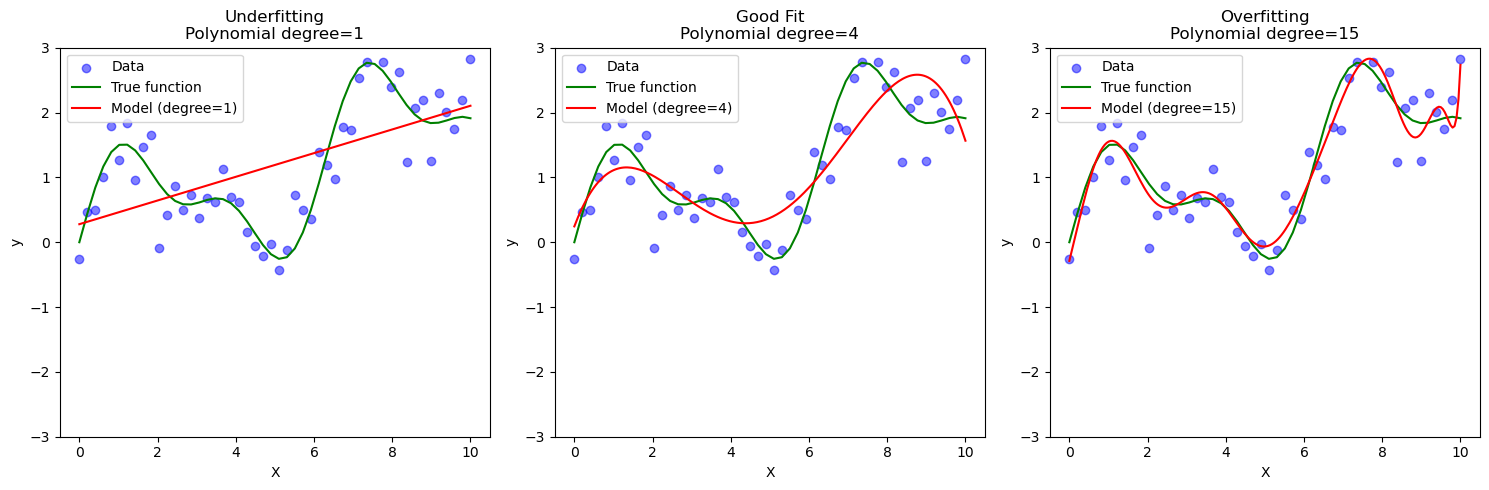

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def generate_complex_data(n_samples=50):
    X = np.linspace(0, 10, n_samples)
    # Complex true function: combination of sine waves and polynomial
    y_true = np.sin(X) + 0.5 * np.sin(2*X) + 0.2*X
    # Add significant noise
    y = y_true + np.random.normal(0, 0.4, n_samples)
    return X, y, y_true

# Generate data
X, y, y_true = generate_complex_data()

# Create models with different complexities
degrees = [1, 4, 15]
titles = ['Underfitting', 'Good Fit', 'Overfitting']

plt.figure(figsize=(15, 5))

for i, (degree, title) in enumerate(zip(degrees, titles), 1):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X.reshape(-1, 1))

    model = LinearRegression()
    model.fit(X_poly, y)

    # Generate smooth curve for predictions
    X_smooth = np.linspace(0, 10, 200)
    X_smooth_poly = poly.transform(X_smooth.reshape(-1, 1))
    y_smooth = model.predict(X_smooth_poly)

    plt.subplot(1, 3, i)
    plt.scatter(X, y, color='blue', alpha=0.5, label='Data')
    plt.plot(X, y_true, 'g-', label='True function')
    plt.plot(X_smooth, y_smooth, 'r-', label=f'Model (degree={degree})')
    plt.title(f'{title}\nPolynomial degree={degree}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.ylim(-3, 3)

plt.tight_layout()
plt.show()